## Over-sampling

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# โหลดข้อมูลที่ clean แล้ว
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Stroke Prediction/healthcare-dataset-stroke-data-cleaned.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


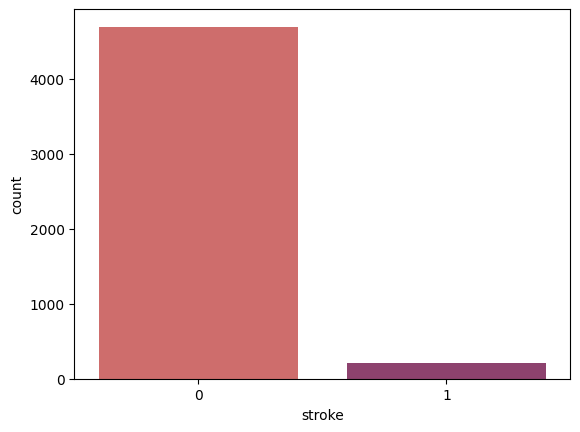

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x=df['stroke'], data=df, palette="flare")

In [5]:
# from imblearn.over_sampling import RandomOverSampler

# # แยก features และ target variable
# X = df.drop('stroke', axis=1)
# y = df['stroke']

# # สร้าง object ของ RandomOverSampler
# rus = RandomOverSampler(random_state=42)

# # ใช้ method fit_resample เพื่อทำ over-sampling
# X_resampled, y_resampled = rus.fit_resample(X, y)

In [6]:
# # แสดงข้อมูลคลาสก่อนและหลัง over-sampling ในรูปแบบ DataFrame
# print("Before over-sampling:")
# print(pd.DataFrame(y.value_counts()))

# print("\nAfter over-sampling:")
# print(pd.DataFrame(y_resampled.value_counts()))

In [7]:
# # รวม X_resampled และ y_resampled ด้วยกัน
# df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['stroke'])], axis=1)
# df_resampled

In [8]:
df_resampled = df

In [9]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 421.9+ KB


In [10]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# ax = sns.countplot(x=df_resampled['stroke'], data=df_resampled, palette="flare")

In [11]:
df_resampled.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,42.868810,0.091891,0.049511,105.297402,28.89456,0.042584
std,22.556128,0.288901,0.216954,44.425550,7.85432,0.201937
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [12]:
# ตรวจสอบ na ในข้อมูล
df_resampled.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
# df_resampled.to_csv('healthcare-dataset-stroke-data-cleaned-over-sampling.csv', index=False)

# Modeling

In [14]:
# เปลี่ยน data type ของ column
df_resampled['hypertension'] = df_resampled['hypertension'].astype(str)
df_resampled['heart_disease'] = df_resampled['heart_disease'].astype(str)
df_resampled['stroke'] = df_resampled['stroke'].astype(str)

In [15]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   object 
 3   heart_disease      4908 non-null   object 
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   object 
dtypes: float64(3), object(8)
memory usage: 421.9+ KB


In [16]:
df_cat  = pd.get_dummies(df_resampled.select_dtypes('object') , drop_first=True)
df_cat

,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,1,0,1,1,0,1,0,0,1,1,0,0,1
1,1,0,1,1,0,1,0,0,0,0,1,0,1
2,0,0,0,1,0,1,0,0,1,0,0,1,1
3,0,1,0,1,0,0,1,0,0,0,1,0,1
4,1,0,0,1,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,0,0,0,0,0,0,0,1,0,0,0,0,0
4904,0,0,0,1,0,0,1,0,1,0,1,0,0
4905,0,0,0,1,0,0,1,0,0,0,1,0,0
4906,1,0,0,1,0,1,0,0,0,1,0,0,0


In [17]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   gender_Male                     4908 non-null   uint8
 1   hypertension_1                  4908 non-null   uint8
 2   heart_disease_1                 4908 non-null   uint8
 3   ever_married_Yes                4908 non-null   uint8
 4   work_type_Never_worked          4908 non-null   uint8
 5   work_type_Private               4908 non-null   uint8
 6   work_type_Self-employed         4908 non-null   uint8
 7   work_type_children              4908 non-null   uint8
 8   Residence_type_Urban            4908 non-null   uint8
 9   smoking_status_formerly smoked  4908 non-null   uint8
 10  smoking_status_never smoked     4908 non-null   uint8
 11  smoking_status_smokes           4908 non-null   uint8
 12  stroke_1                        4908 non-null   uint8
dtypes: 

In [18]:
df_num = df_resampled.select_dtypes('number')
df_num

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,80.0,105.92,32.5
2,49.0,171.23,34.4
3,79.0,174.12,24.0
4,81.0,186.21,29.0
...,...,...,...
4903,13.0,103.08,18.6
4904,81.0,125.20,40.0
4905,35.0,82.99,30.6
4906,51.0,166.29,25.6


In [19]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4908 non-null   float64
 1   avg_glucose_level  4908 non-null   float64
 2   bmi                4908 non-null   float64
dtypes: float64(3)
memory usage: 115.2 KB


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
df_num_scaler = StandardScaler().fit_transform(df_num)
df_num_scaler

array([[ 1.06993757,  2.77779723,  0.98114481],
       [ 1.64633634,  0.01401584,  0.45908589],
       [ 0.27184695,  1.48426559,  0.70101563],
       ...,
       [-0.34889019, -0.50218118,  0.21715615],
       [ 0.36052369,  1.37305699, -0.41950107],
       [ 0.05015511, -0.45062901, -0.3431022 ]])

In [22]:
df_num_scaler_final = pd.DataFrame(df_num_scaler, columns=df_num.columns, index=df_num.index)
df_num_scaler_final

,age,avg_glucose_level,bmi
0,1.069938,2.777797,0.981145
1,1.646336,0.014016,0.459086
2,0.271847,1.484266,0.701016
3,1.601998,1.549325,-0.623231
4,1.690675,1.821493,0.013426
...,...,...,...
4903,-1.324334,-0.049918,-1.310821
4904,1.690675,0.448045,1.414072
4905,-0.348890,-0.502181,0.217156
4906,0.360524,1.373057,-0.419501


In [23]:
df_final = pd.concat([df_num_scaler_final, df_cat],axis=1) # axis=1 จะเป็นการต่อในแนวนอน
df_final

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,1.069938,2.777797,0.981145,1,0,1,1,0,1,0,0,1,1,0,0,1
1,1.646336,0.014016,0.459086,1,0,1,1,0,1,0,0,0,0,1,0,1
2,0.271847,1.484266,0.701016,0,0,0,1,0,1,0,0,1,0,0,1,1
3,1.601998,1.549325,-0.623231,0,1,0,1,0,0,1,0,0,0,1,0,1
4,1.690675,1.821493,0.013426,1,0,0,1,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,-1.324334,-0.049918,-1.310821,0,0,0,0,0,0,0,1,0,0,0,0,0
4904,1.690675,0.448045,1.414072,0,0,0,1,0,0,1,0,1,0,1,0,0
4905,-0.348890,-0.502181,0.217156,0,0,0,1,0,0,1,0,0,0,1,0,0
4906,0.360524,1.373057,-0.419501,1,0,0,1,0,1,0,0,0,1,0,0,0


In [24]:
y = df_final['stroke_1']
X = df_final.drop('stroke_1', axis=1)

In [25]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4903    0
4904    0
4905    0
4906    0
4907    0
Name: stroke_1, Length: 4908, dtype: uint8

In [26]:
X

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.069938,2.777797,0.981145,1,0,1,1,0,1,0,0,1,1,0,0
1,1.646336,0.014016,0.459086,1,0,1,1,0,1,0,0,0,0,1,0
2,0.271847,1.484266,0.701016,0,0,0,1,0,1,0,0,1,0,0,1
3,1.601998,1.549325,-0.623231,0,1,0,1,0,0,1,0,0,0,1,0
4,1.690675,1.821493,0.013426,1,0,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,-1.324334,-0.049918,-1.310821,0,0,0,0,0,0,0,1,0,0,0,0
4904,1.690675,0.448045,1.414072,0,0,0,1,0,0,1,0,1,0,1,0
4905,-0.348890,-0.502181,0.217156,0,0,0,1,0,0,1,0,0,0,1,0
4906,0.360524,1.373057,-0.419501,1,0,0,1,0,1,0,0,0,1,0,0


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=12
)

In [29]:
X_train

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2850,0.050155,-1.012525,-0.495900,1,0,0,1,0,1,0,0,0,0,1,0
1659,1.468983,-0.072430,0.268089,0,1,1,1,0,1,0,0,0,0,0,1
3317,-1.279996,-0.692406,-0.470434,1,0,0,0,0,0,0,1,1,0,0,0
2406,1.557660,0.894455,-0.266703,1,0,1,1,0,1,0,0,1,1,0,0
114,1.468983,2.295818,0.764681,0,0,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,1.735013,0.146611,-1.158023,1,0,0,1,0,0,1,0,1,1,0,0
1283,-0.570582,-0.969077,0.611884,0,0,0,1,0,0,0,0,0,0,1,0
3714,0.094493,-0.320961,-0.992493,0,0,0,1,0,1,0,0,1,0,1,0
3325,-0.171537,-0.757241,-0.024774,1,1,0,1,0,0,1,0,1,0,1,0


In [30]:
y_train.value_counts()

0    3762
1     164
Name: stroke_1, dtype: int64

In [31]:
X_test

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2911,-0.614920,-0.072655,0.369954,0,0,0,1,0,1,0,0,0,0,1,0
3828,-0.570582,-0.990689,-0.623231,0,0,0,1,0,0,0,0,1,0,0,0
691,1.247291,0.099786,0.000693,1,0,0,1,0,1,0,0,0,0,1,0
4418,-1.058304,-0.395700,-0.916094,0,0,0,0,0,1,0,0,1,0,1,0
96,1.247291,2.513283,0.255356,1,1,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470,-1.324334,-0.164953,-0.559566,1,0,0,0,0,0,0,1,0,0,1,0
841,-0.703597,-0.018401,0.955679,1,0,0,1,0,1,0,0,0,0,0,1
1386,-0.969627,0.060390,-0.253970,0,0,0,0,0,1,0,0,0,0,1,0
370,0.936922,-0.533473,0.942945,0,0,0,0,0,0,0,0,0,0,0,1


In [32]:
y_test.value_counts()

0    937
1     45
Name: stroke_1, dtype: int64

In [33]:
from imblearn.over_sampling import RandomOverSampler

# สร้าง object ของ RandomOverSampler
ros = RandomOverSampler(random_state=42)

# ใช้ method fit_resample เพื่อทำ over-sampling ใน Training set เท่านั้น
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [34]:
# แสดงข้อมูลคลาสก่อนและหลัง over-sampling ในรูปแบบ DataFrame
print("train set Before over-sampling:")
print(pd.DataFrame(y_train.value_counts()))

print("\n train set After over-sampling:")
print(pd.DataFrame(y_train_resampled.value_counts()))

train set Before over-sampling:
   stroke_1
0      3762
1       164

 train set After over-sampling:
   stroke_1
0      3762
1      3762


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
precision_score, recall_score, classification_report

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9256619144602851

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       937
           1       0.13      0.11      0.12        45

    accuracy                           0.93       982
   macro avg       0.54      0.54      0.54       982
weighted avg       0.92      0.93      0.92       982



In [ ]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

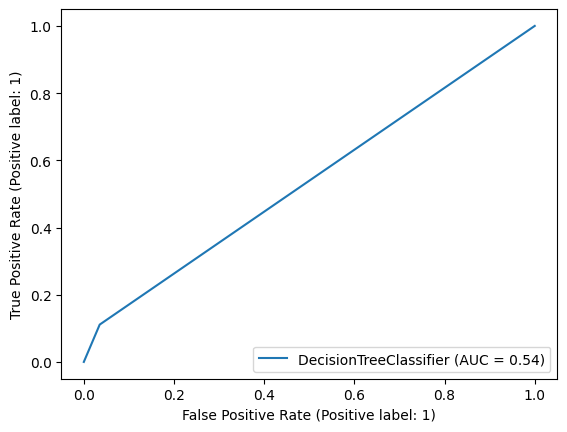

In [ ]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

In [ ]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.5379461638799953

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
scores = []
for n in range(50, 101):
  rf = RandomForestClassifier(n_estimators=n, random_state=555)
  scores.append(cross_val_score(rf, X, y, cv=5).mean())
max_score = max(scores)
max_index = scores.index(max_score)+50
print(max_index, max_score)

72 0.9563978317150088


In [ ]:
rf = RandomForestClassifier(n_estimators=75 , random_state=555)

In [ ]:
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(n_estimators=75, random_state=555)

In [ ]:
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=935590298),
 DecisionTreeClassifier(max_features='sqrt', random_state=1299452590),
 DecisionTreeClassifier(max_features='sqrt', random_state=205536233),
 DecisionTreeClassifier(max_features='sqrt', random_state=707945505),
 DecisionTreeClassifier(max_features='sqrt', random_state=1908992580),
 DecisionTreeClassifier(max_features='sqrt', random_state=2114428285),
 DecisionTreeClassifier(max_features='sqrt', random_state=800496166),
 DecisionTreeClassifier(max_features='sqrt', random_state=2027234710),
 DecisionTreeClassifier(max_features='sqrt', random_state=348782825),
 DecisionTreeClassifier(max_features='sqrt', random_state=1684888573),
 DecisionTreeClassifier(max_features='sqrt', random_state=612799984),
 DecisionTreeClassifier(max_features='sqrt', random_state=762371381),
 DecisionTreeClassifier(max_features='sqrt', random_state=1915208288),
 DecisionTreeClassifier(max_features='sqrt', random_state=1459143764),
 DecisionTree

In [ ]:
predictions = rf.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
precision_score, recall_score, classification_report

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       937
           1       0.09      0.02      0.04        45

    accuracy                           0.95       982
   macro avg       0.52      0.51      0.50       982
weighted avg       0.92      0.95      0.93       982



In [ ]:
importances = rf.feature_importances_
importances

array([3.79795544e-01, 2.04337370e-01, 1.71931658e-01, 2.24398377e-02,
       3.13118989e-02, 2.29739505e-02, 4.74301493e-02, 1.53180589e-04,
       1.75384792e-02, 1.76866469e-02, 1.25372236e-02, 2.14942985e-02,
       1.47205525e-02, 2.02967702e-02, 1.53524400e-02])

In [ ]:
Variable_importance = pd.DataFrame(dict(Feature=X.columns,
                  Value=rf.feature_importances_))\
  .sort_values(by='Value', ascending=False)

In [ ]:
Variable_importance

,Feature,Value
0,age,0.379796
1,avg_glucose_level,0.204337
2,bmi,0.171932
6,ever_married_Yes,0.047430
4,hypertension_1,0.031312
5,heart_disease_1,0.022974
3,gender_Male,0.022440
11,Residence_type_Urban,0.021494
13,smoking_status_never smoked,0.020297
9,work_type_Self-employed,0.017687


In [ ]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

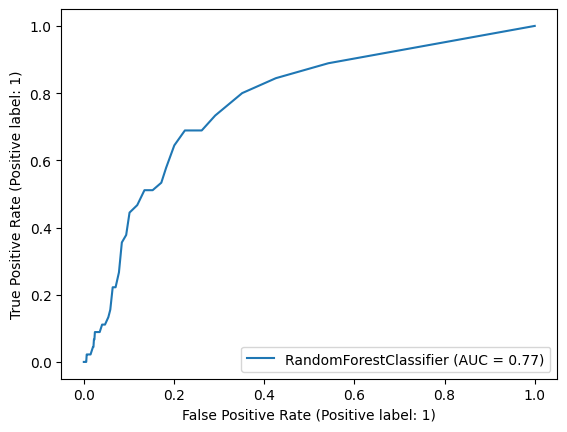

In [ ]:
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.show()

In [ ]:
roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

0.7722400094865409

## XGBoost

In [35]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
y_pred = xgb_model.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
precision_score, recall_score, classification_report

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       937
           1       0.11      0.04      0.06        45

    accuracy                           0.94       982
   macro avg       0.53      0.51      0.52       982
weighted avg       0.92      0.94      0.93       982



In [39]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

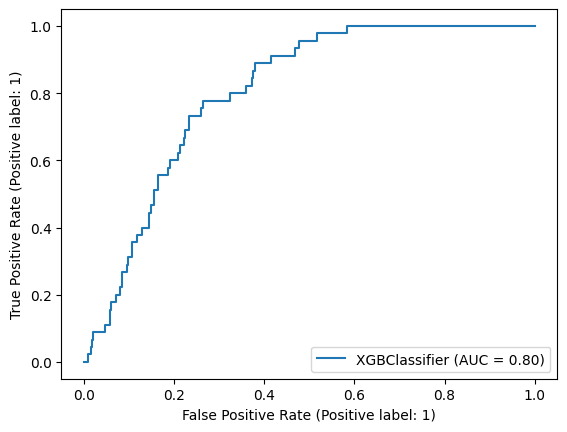

In [40]:
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)
plt.show()

In [41]:
roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1])

0.8035811692161746



---

